In [87]:
using DrWatson
@quickactivate
using Revise
using CairoMakie
includet("../src/main.jl")

For the same parameter, the left-hand transition matrix $M_l$ has a 180-degree rotation about the right-hand matrix $M_r$ : $M_l[i,j] = M_r[n-i,n-j]$. 

## Test the different algorithms for the problem

In [94]:
dir = "test_alg"
df = get_results(; dir);
ldf, rdf = split_results(df);

┌ Info: Scanning folder /Users/zijin/projects/ion_scattering_by_SWD/data/test for result files.
└ @ DrWatson /Users/zijin/.julia/packages/DrWatson/8XYbJ/src/result_collection.jl:117
┌ Info: Added 108 entries.
└ @ DrWatson /Users/zijin/.julia/packages/DrWatson/8XYbJ/src/result_collection.jl:193


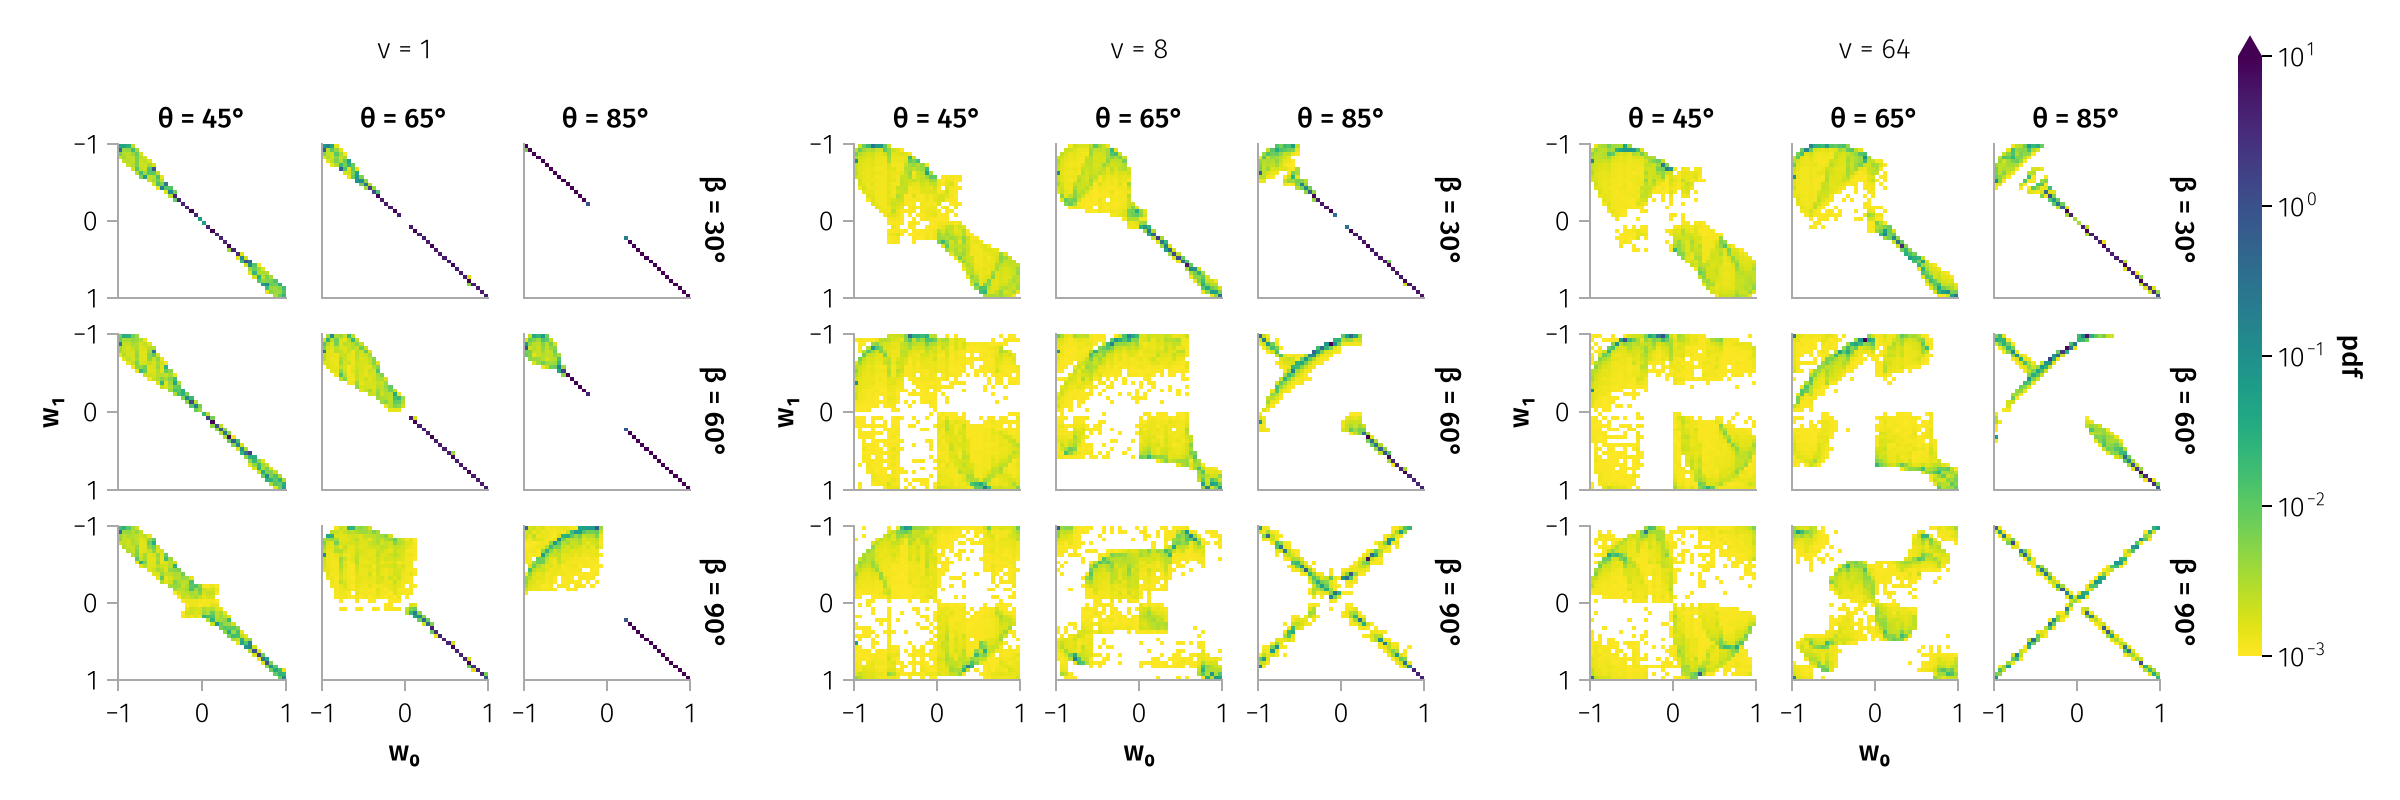

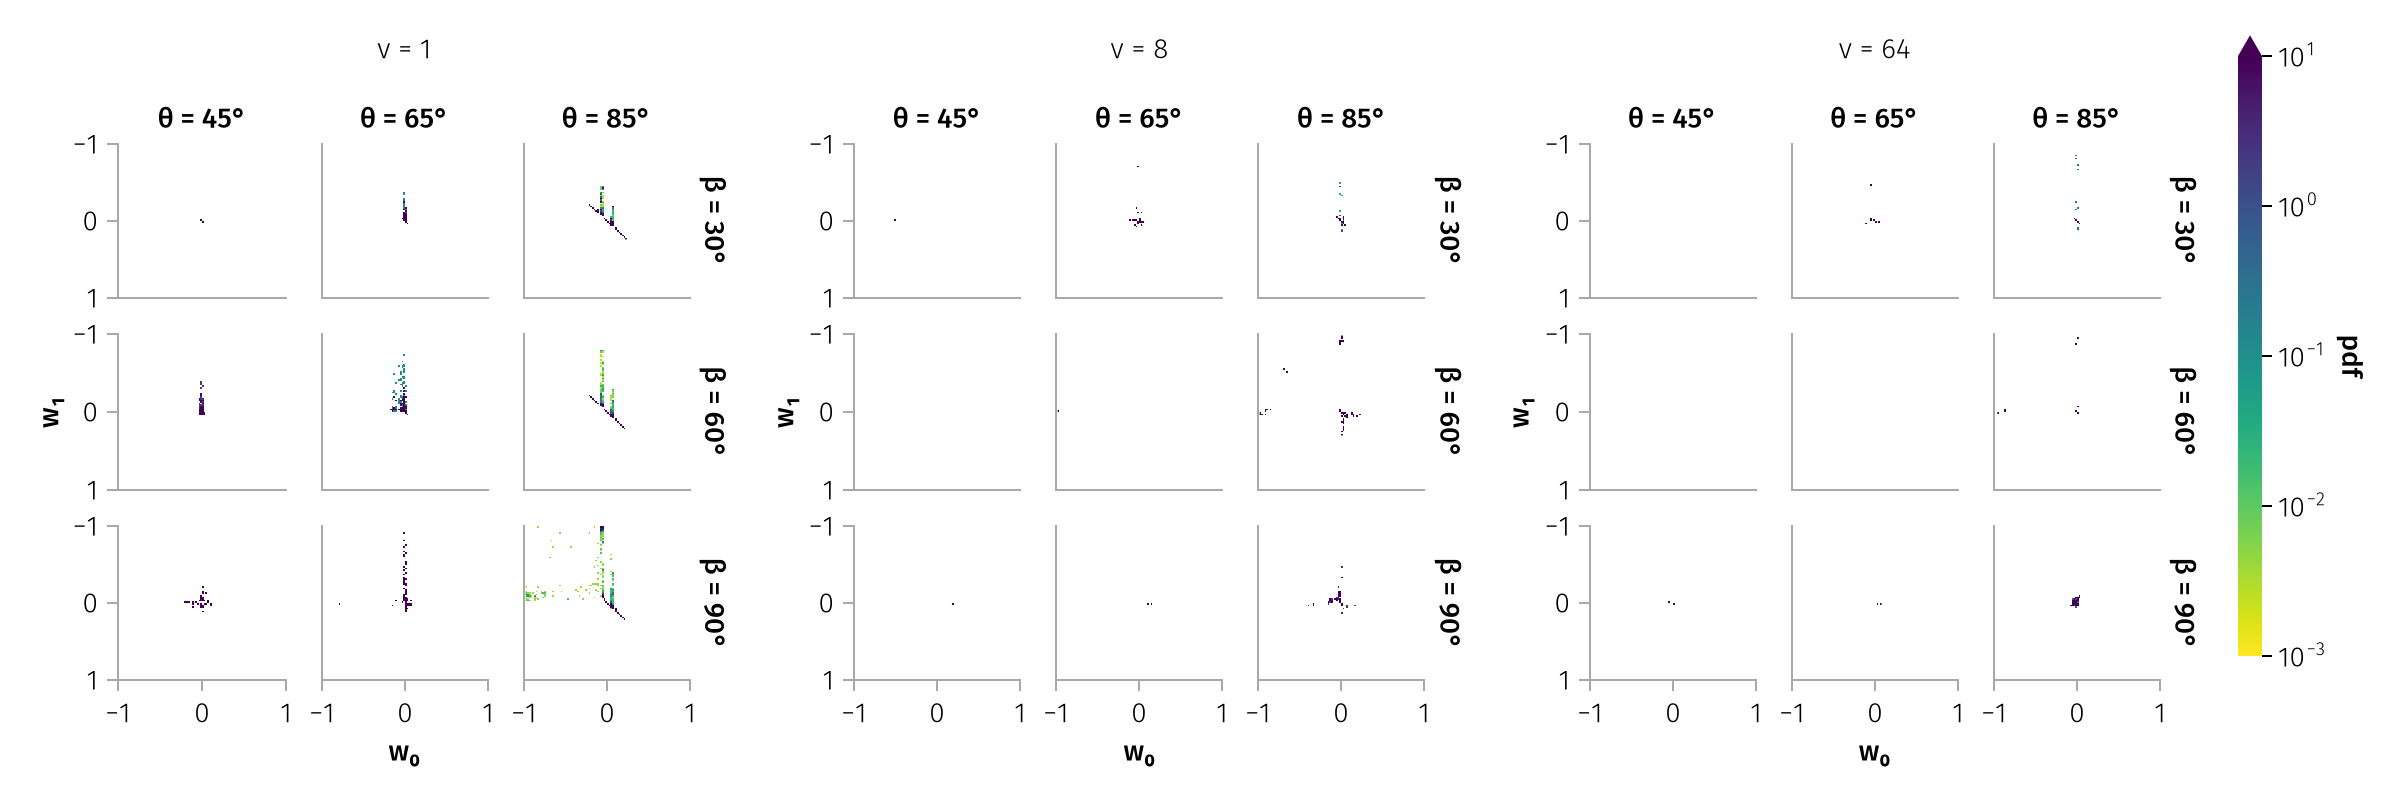

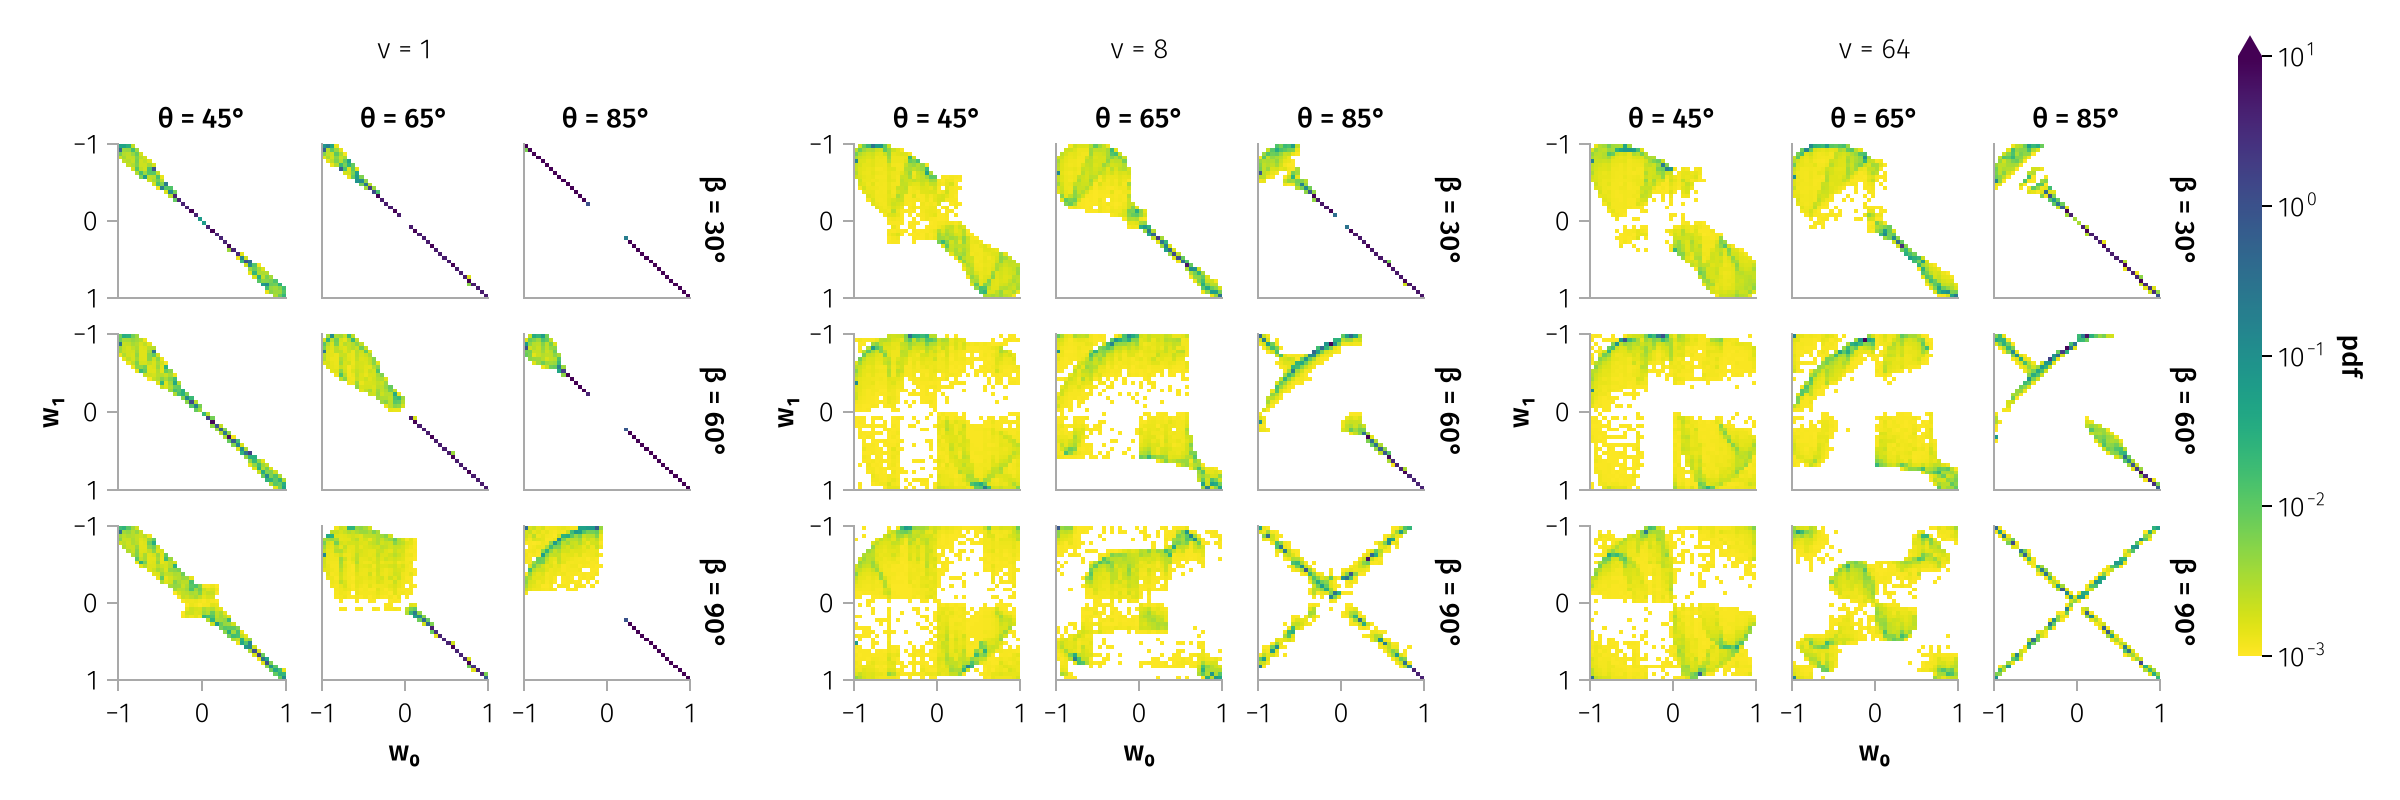

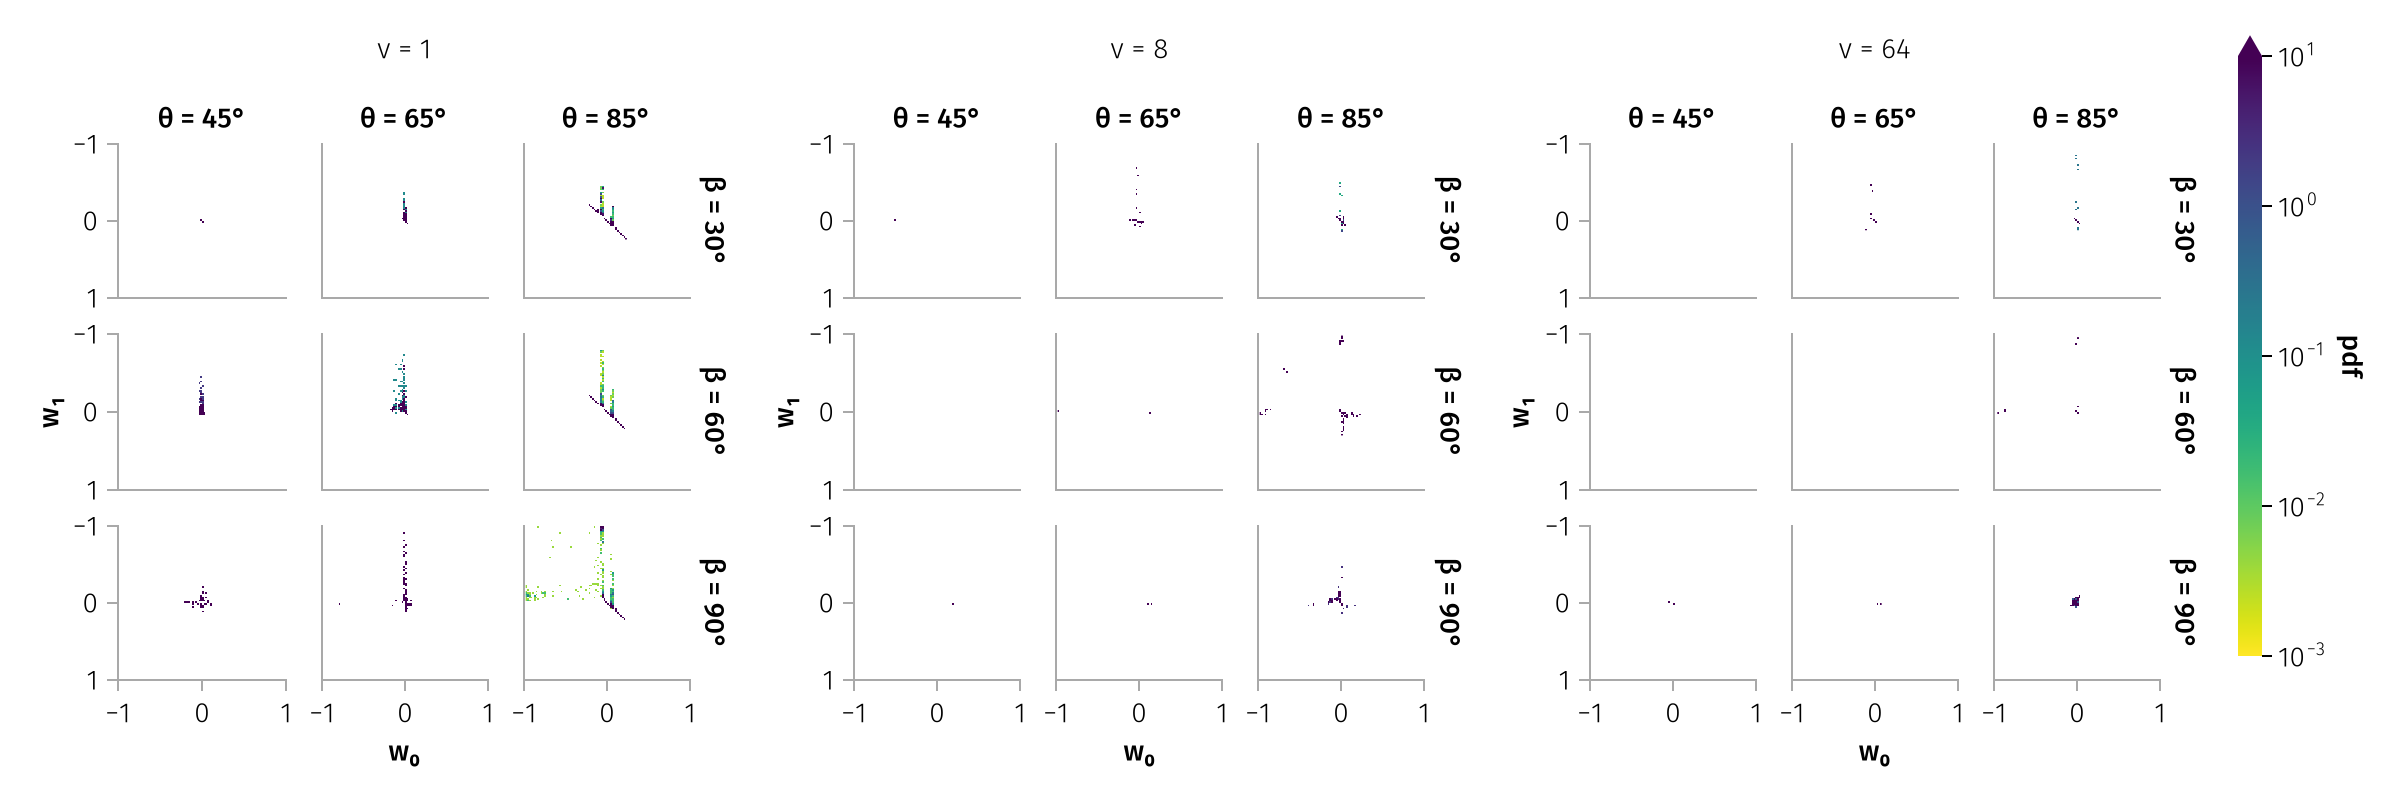

In [99]:
for subdf in groupby(ldf, :alg_sym)
    pa_pair_hist(subset_leave(subdf)) |> display
    pa_pair_hist(subset_trap(subdf)) |> display
end

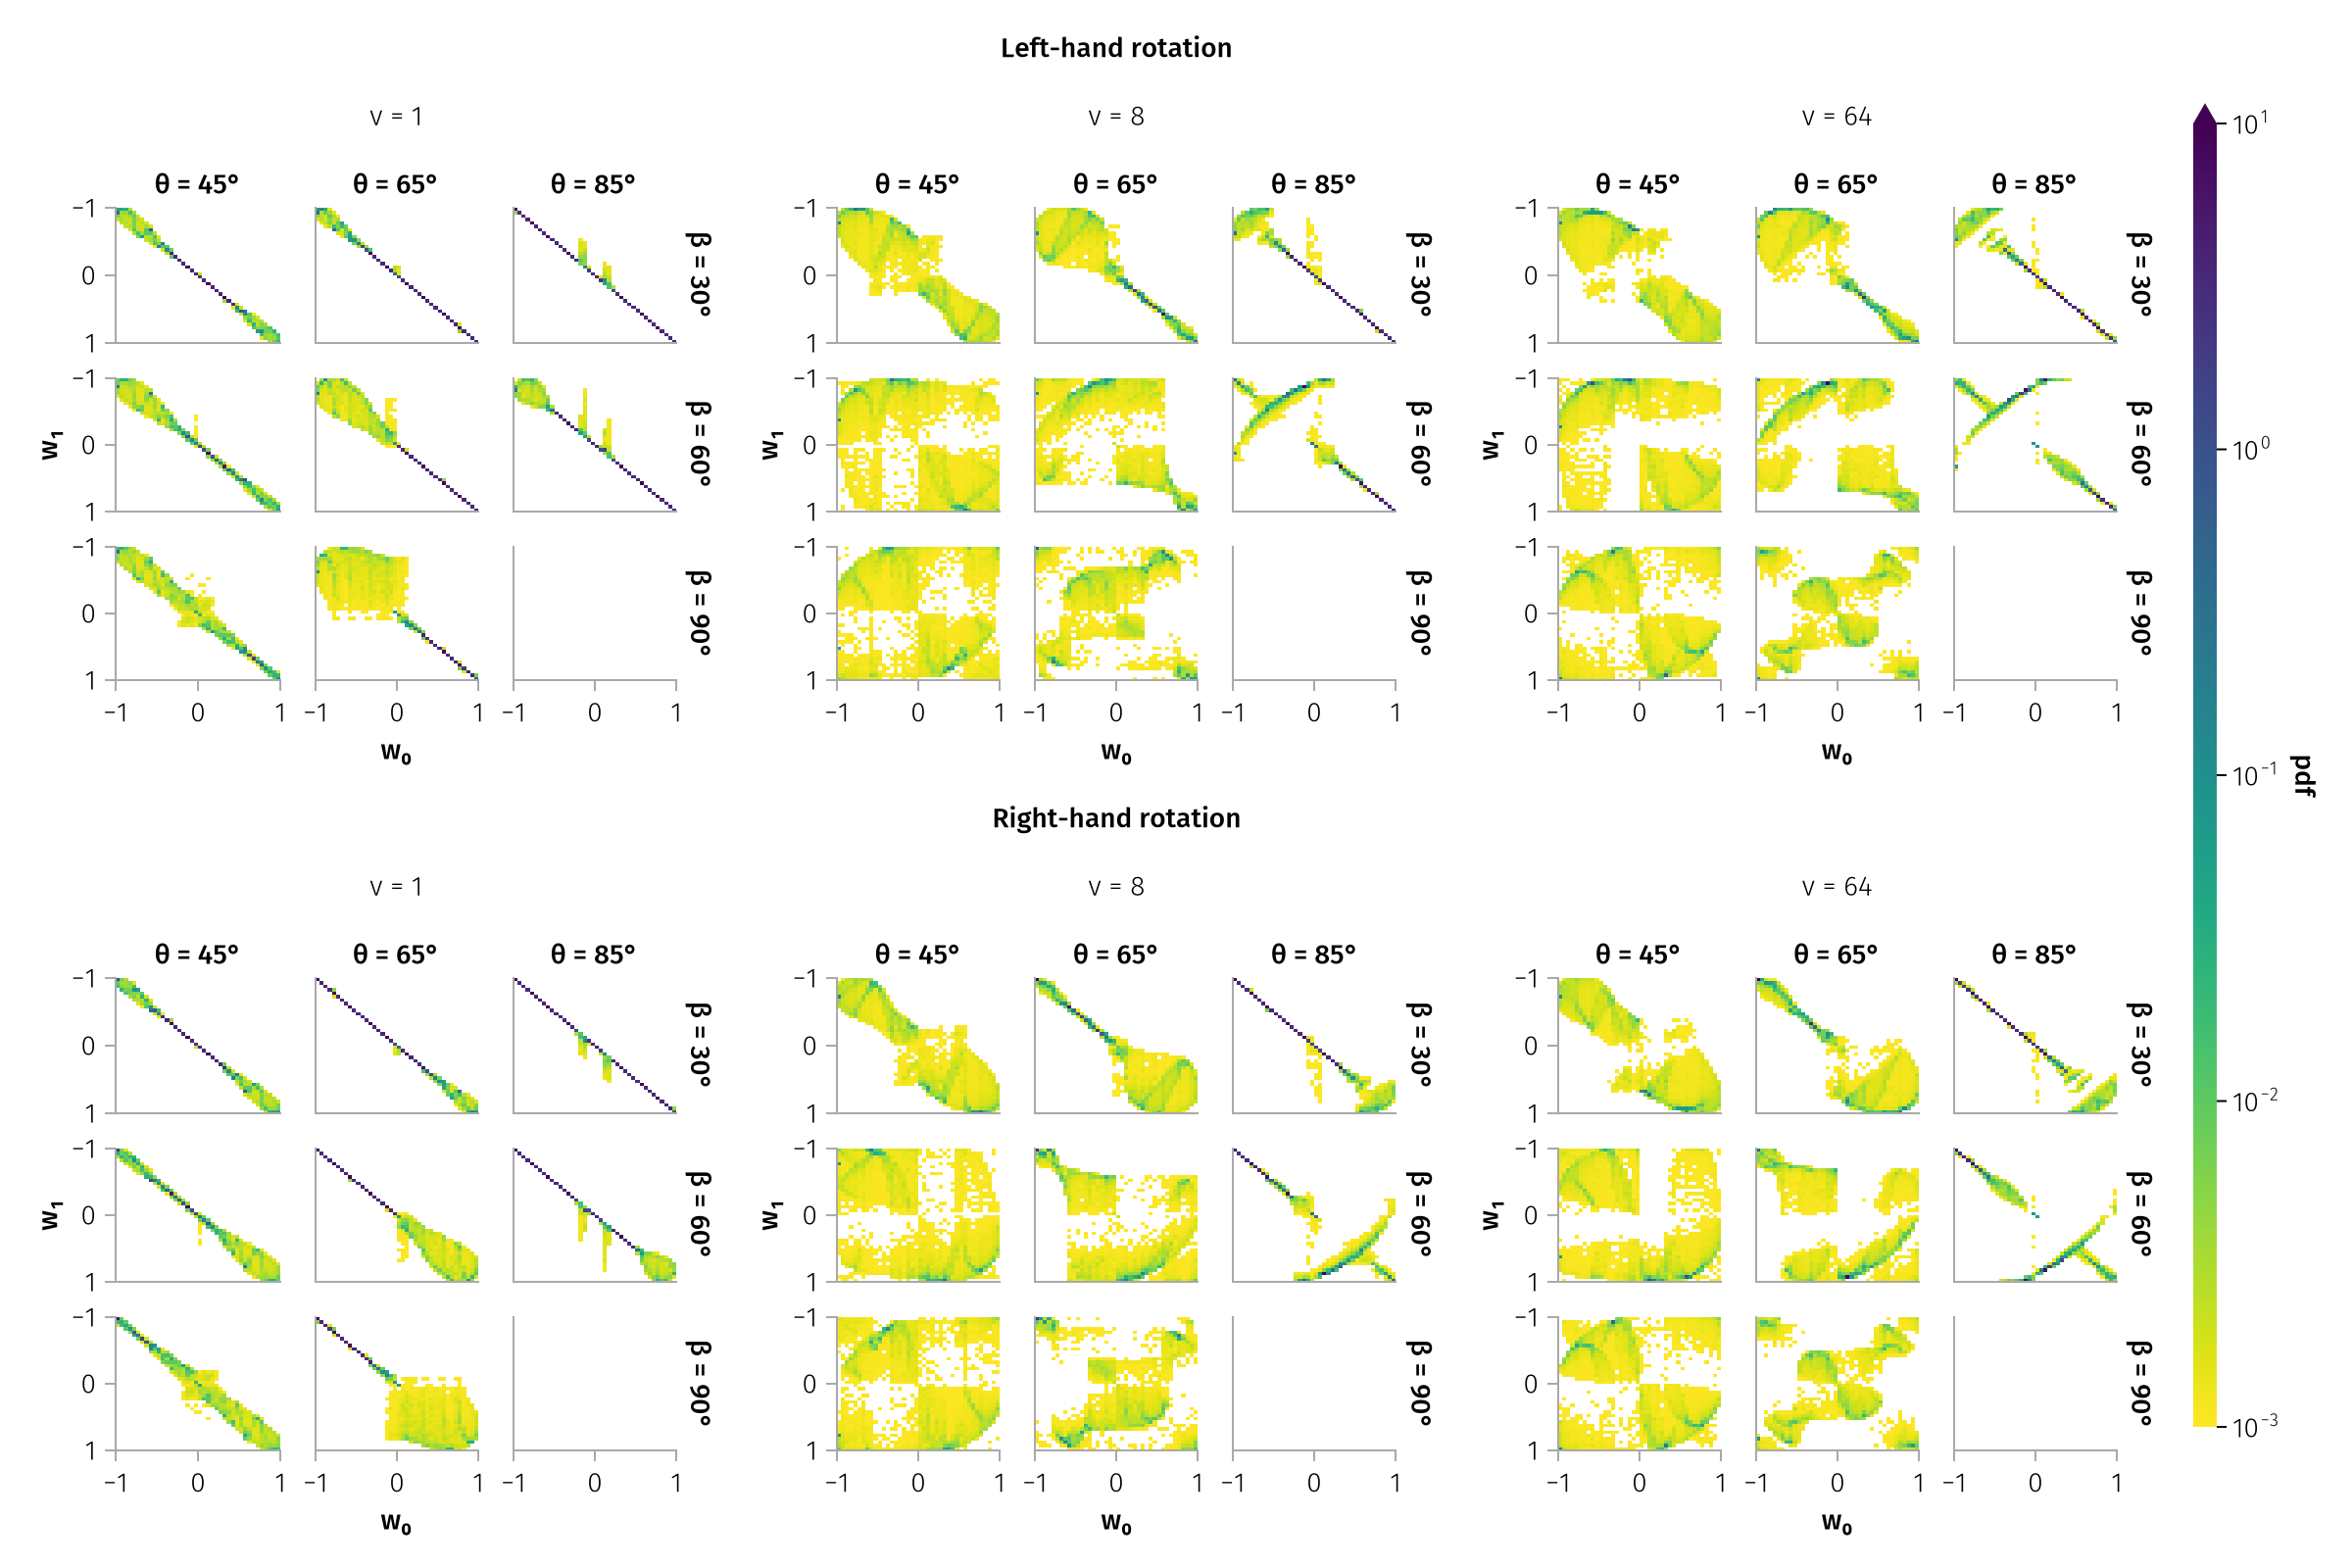

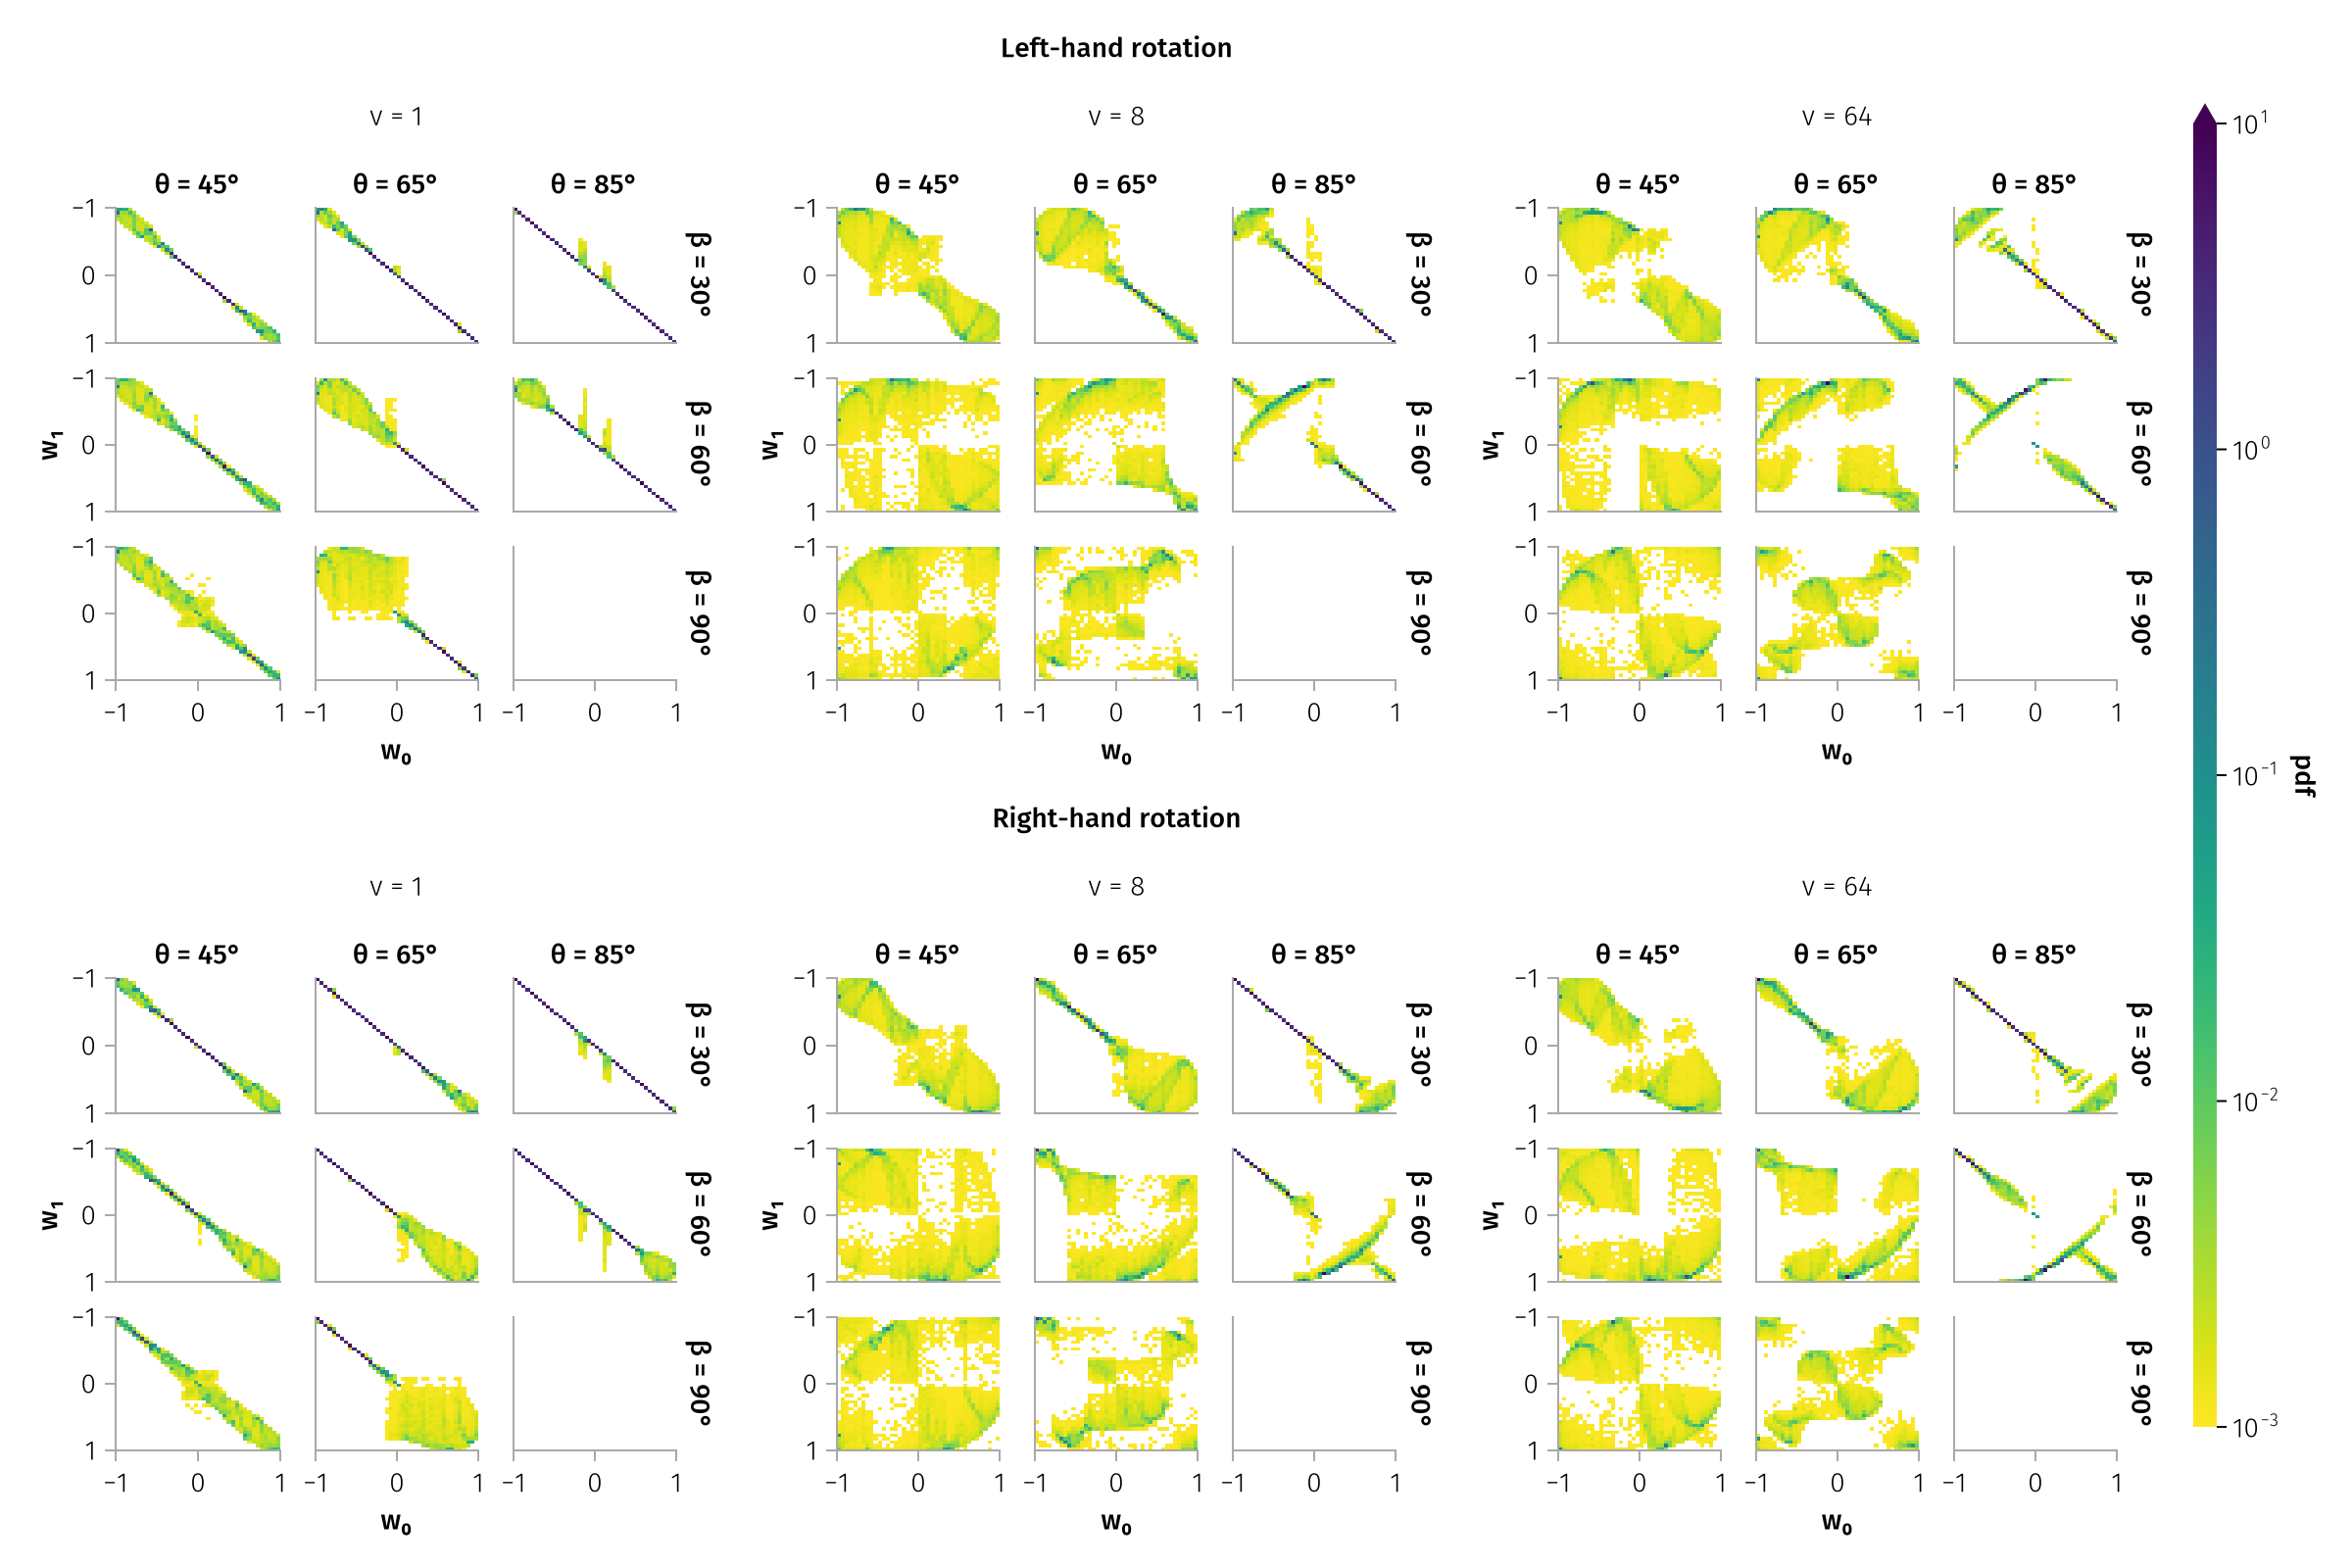

BoundsError: BoundsError: attempt to access 0-element Vector{Any} at index [1]

In [38]:
pa_pair_plot(ldf, rdf) |> display
pa_pair_plot(ldf, rdf; func) |> display
pa_pair_plot(ldf, rdf; func=func_t) |> display

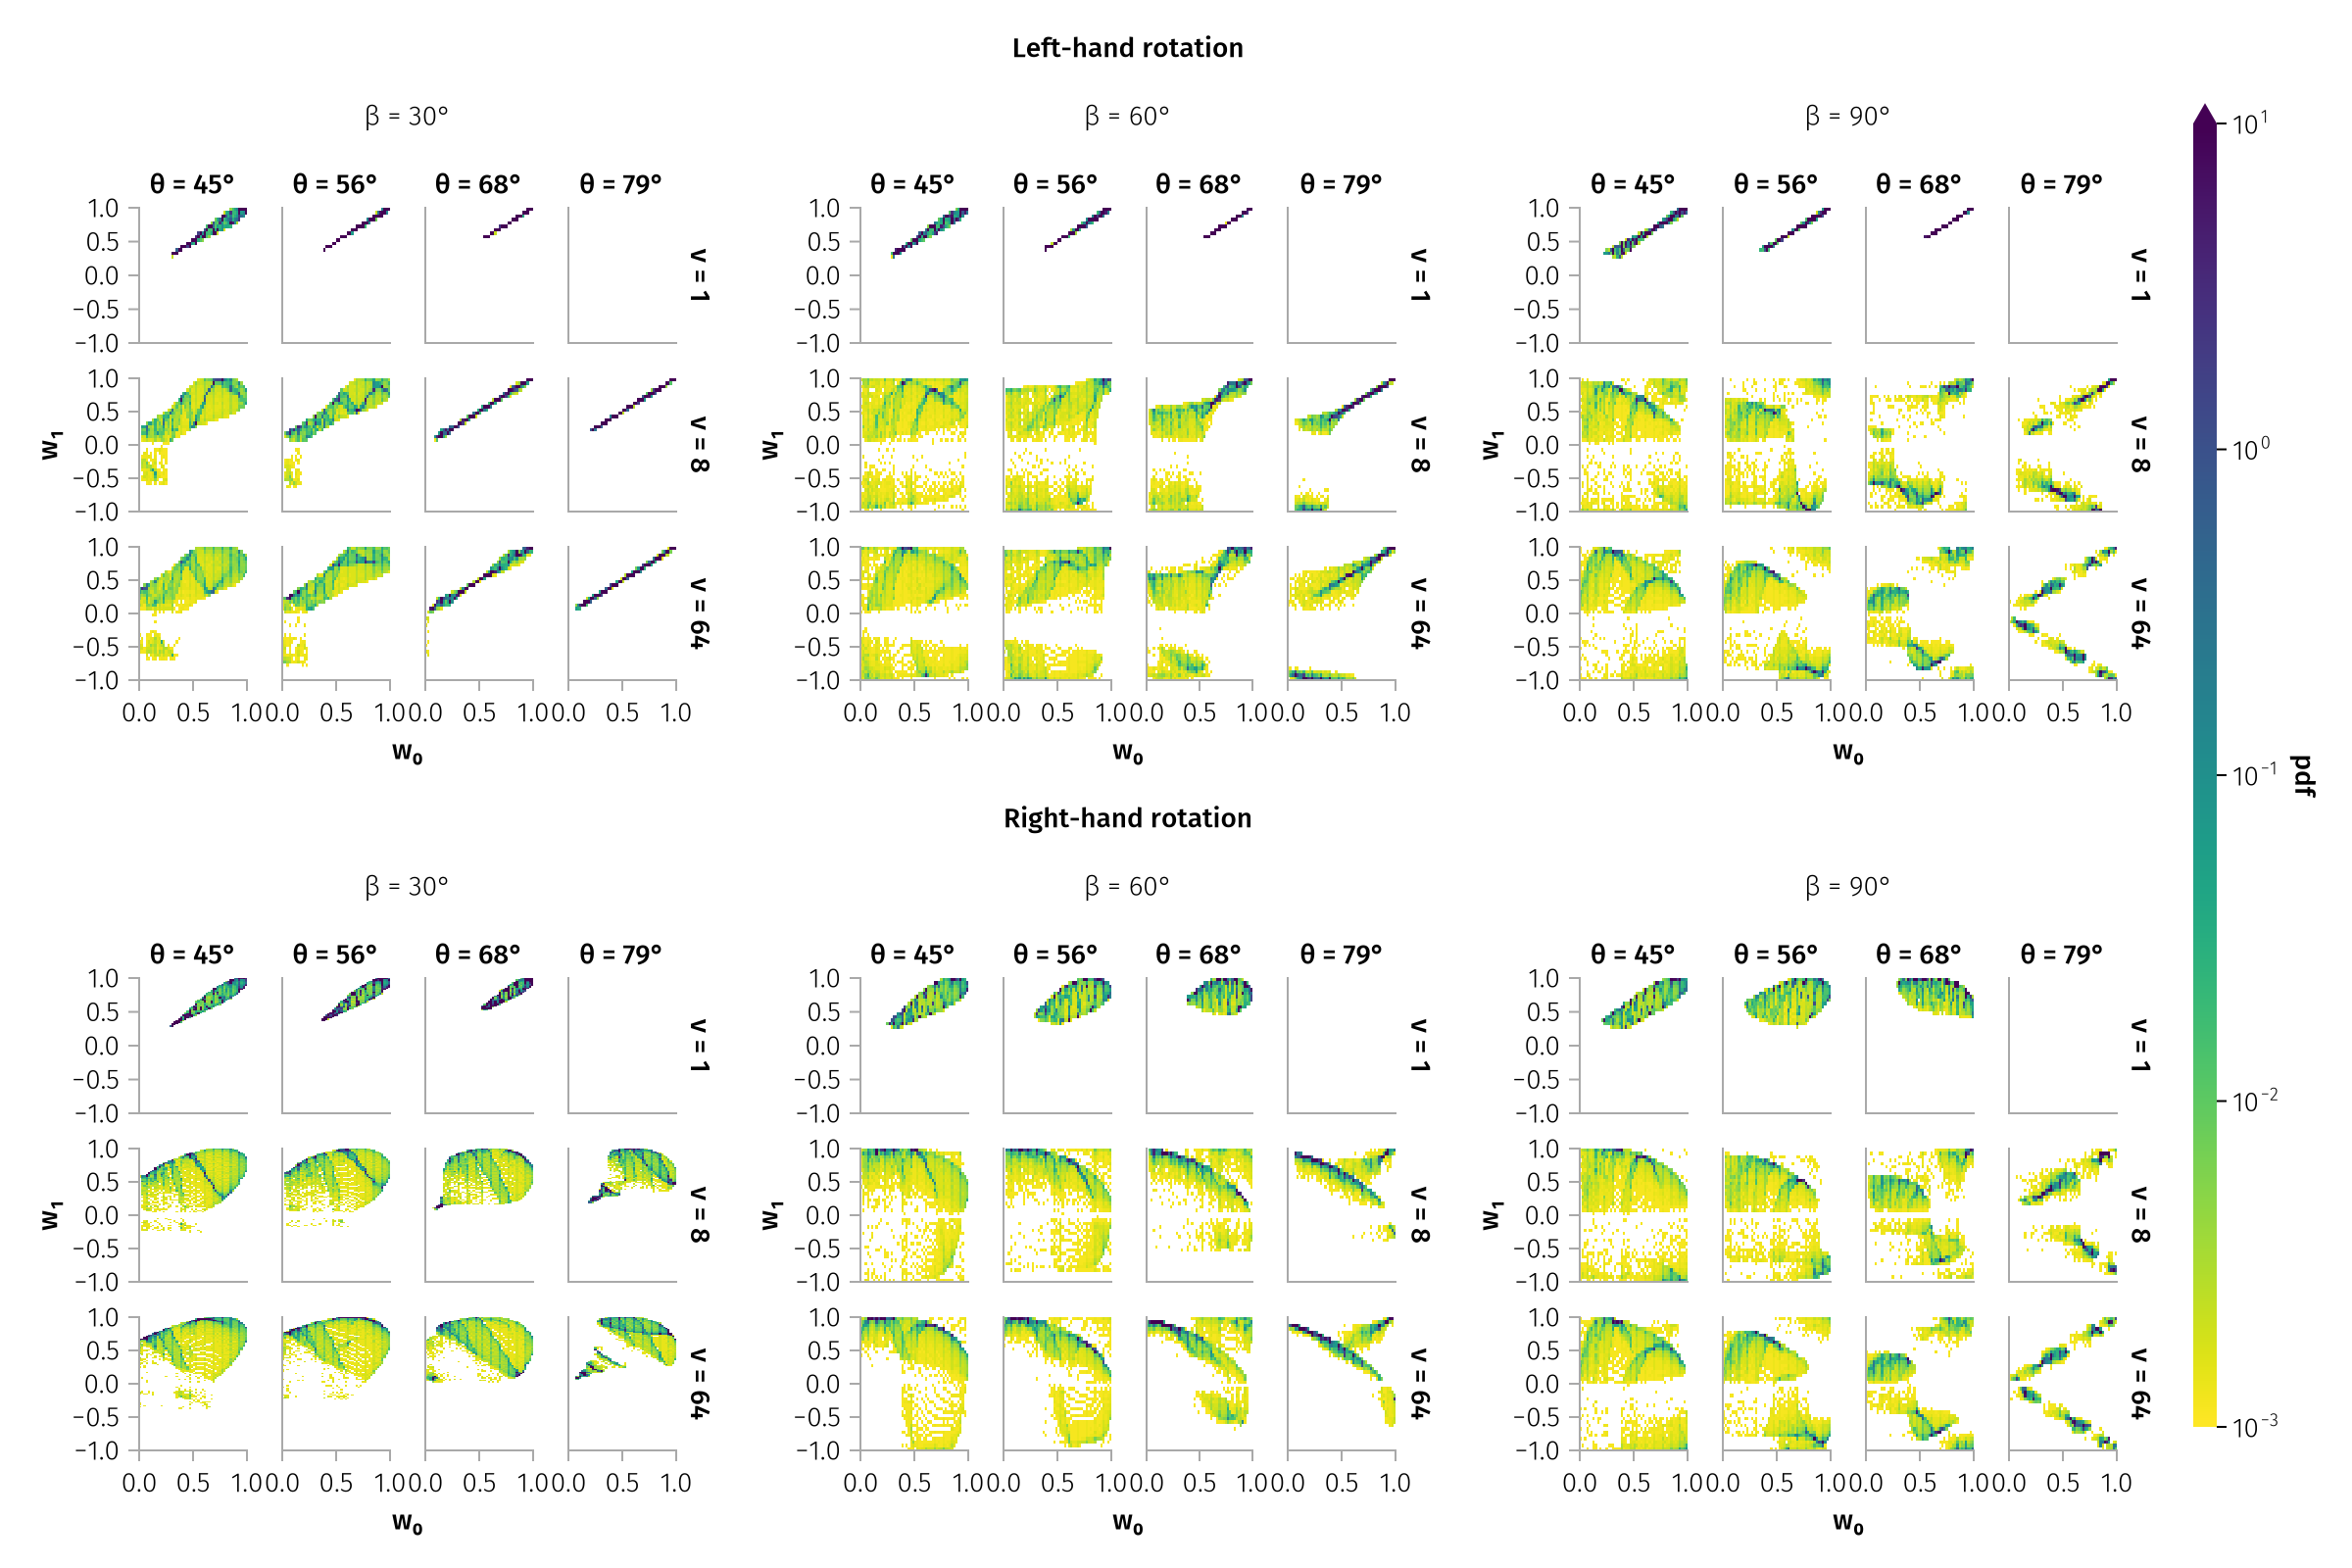

In [72]:
pa_pair_plot(ldf, rdf; s = :β, func)

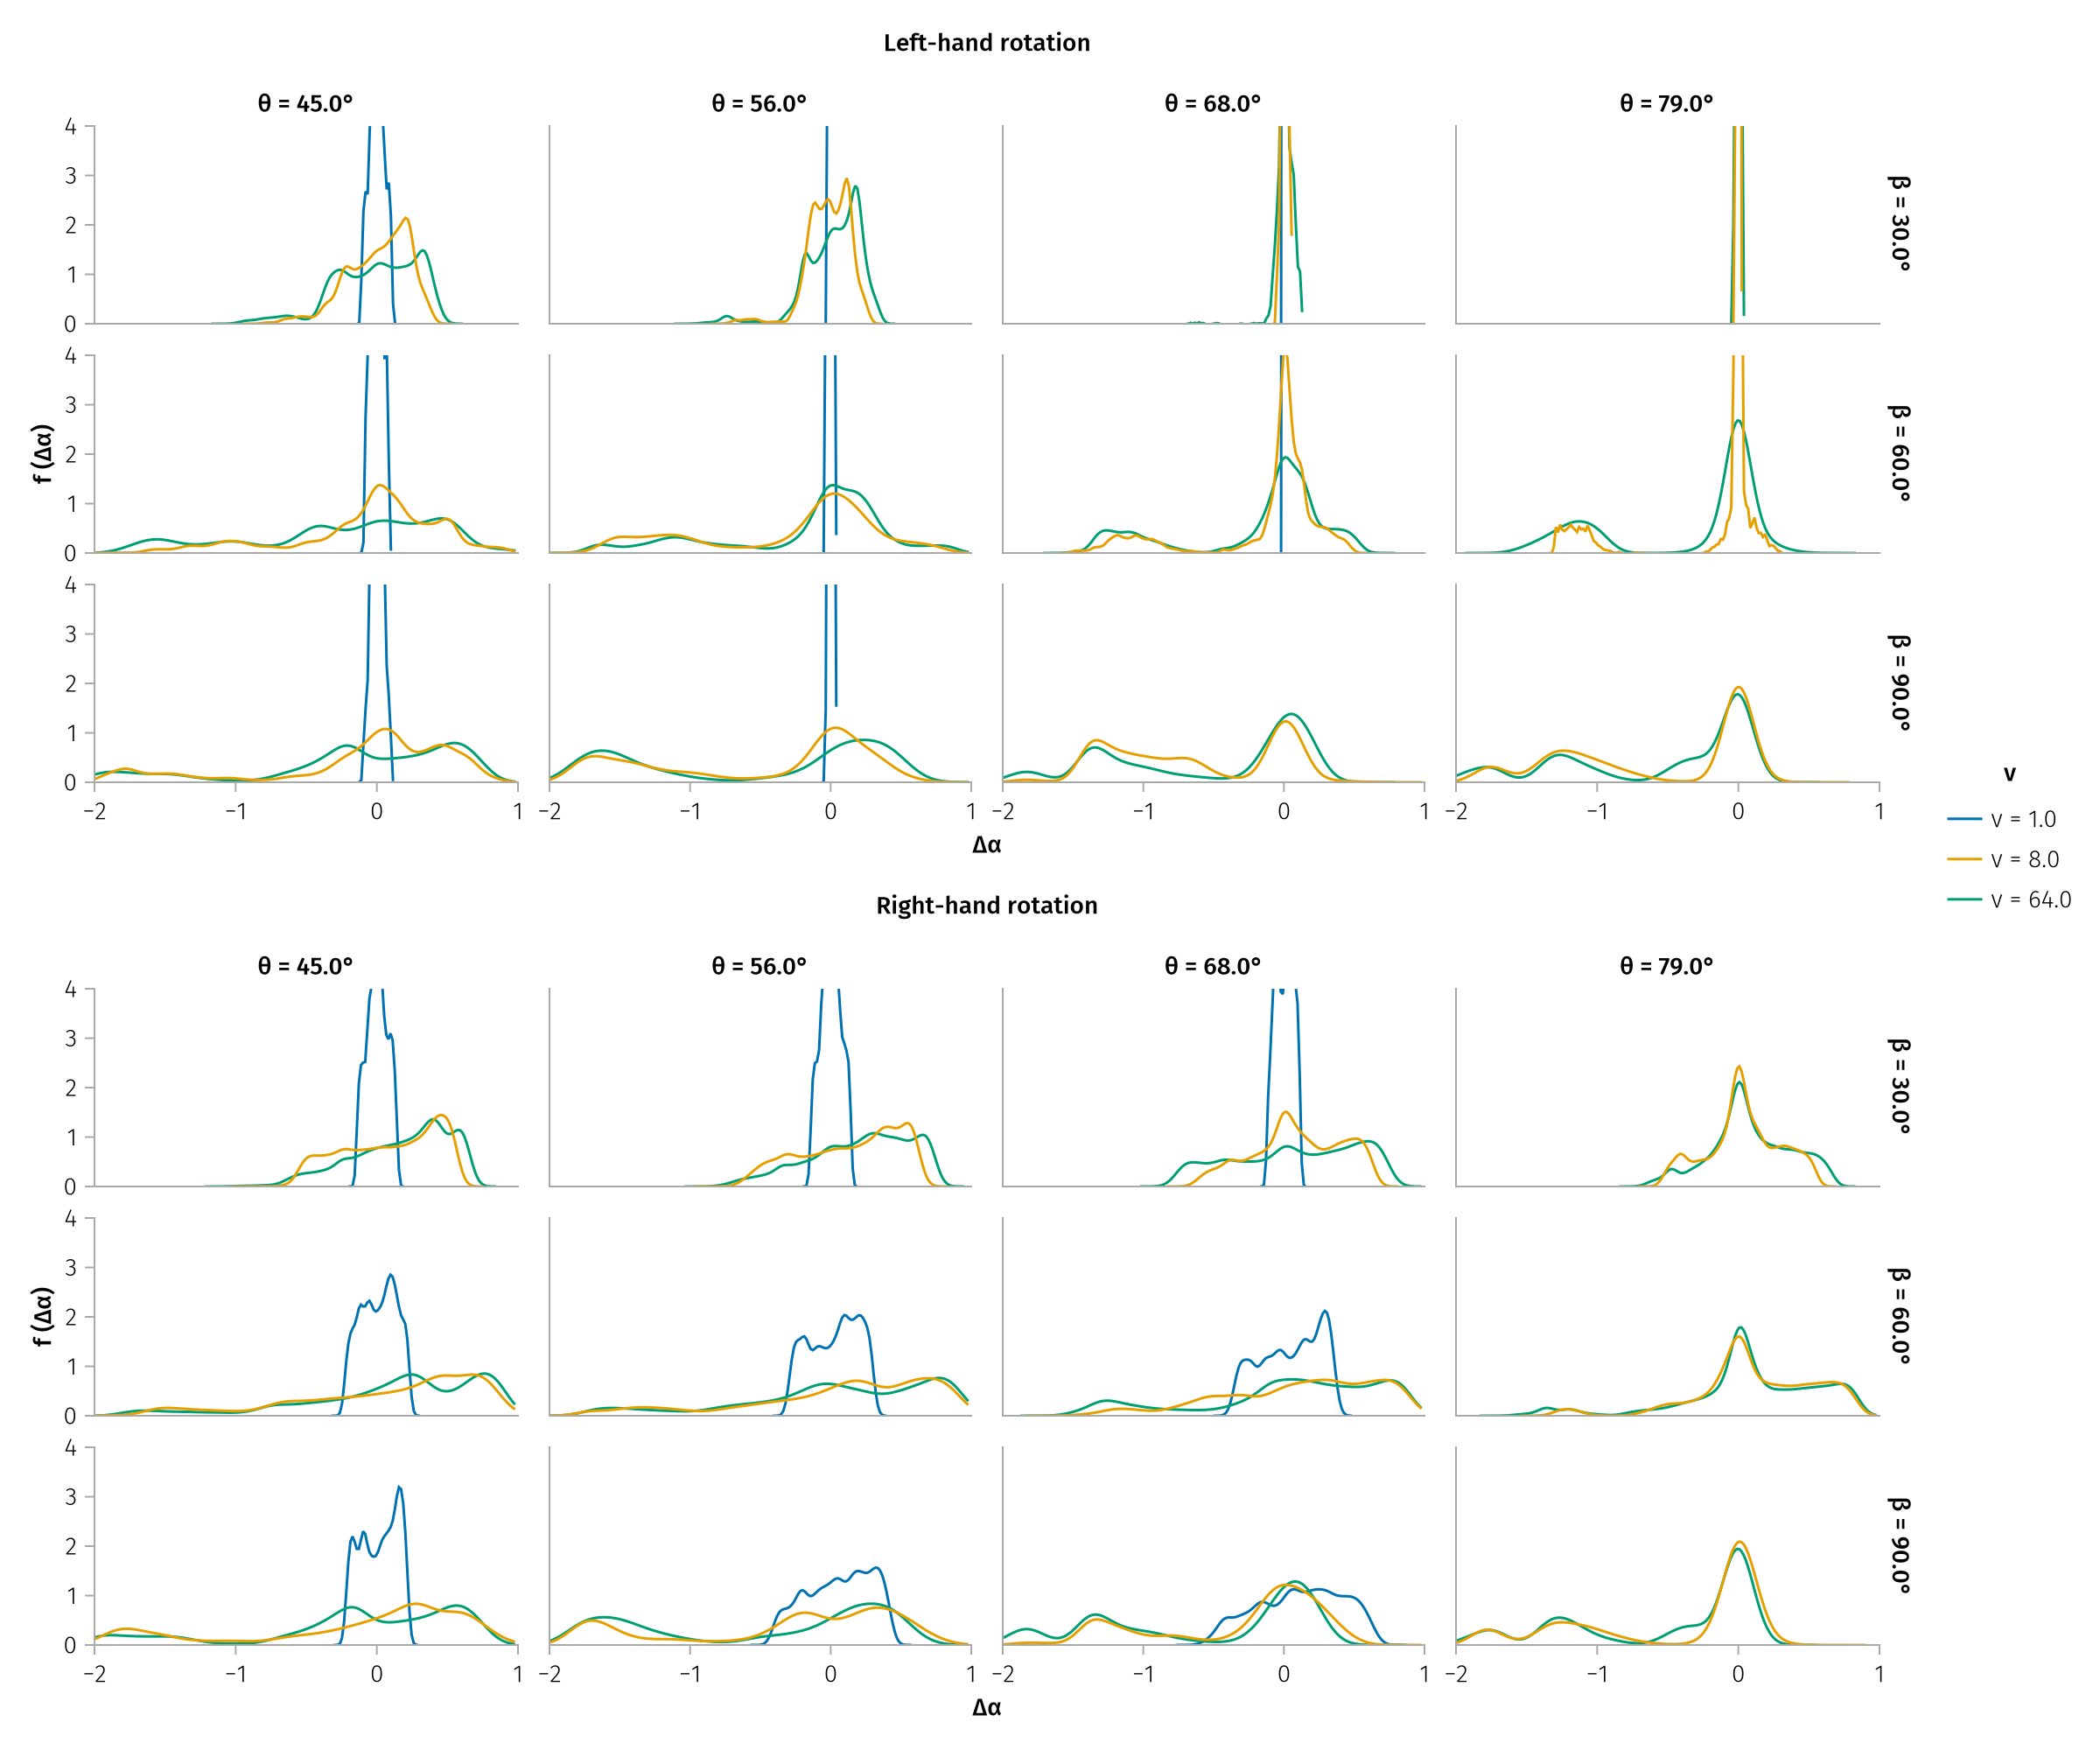

In [128]:
fig = Figure(; size=(1200, 1000,))
gridsl = pa_diff_plot!(fig[1,1], func(ldf))
gridsr = pa_diff_plot!(fig[3,1], func(rdf))
sign_label(fig)
legend!(fig[:,end+1], gridsl)
fig

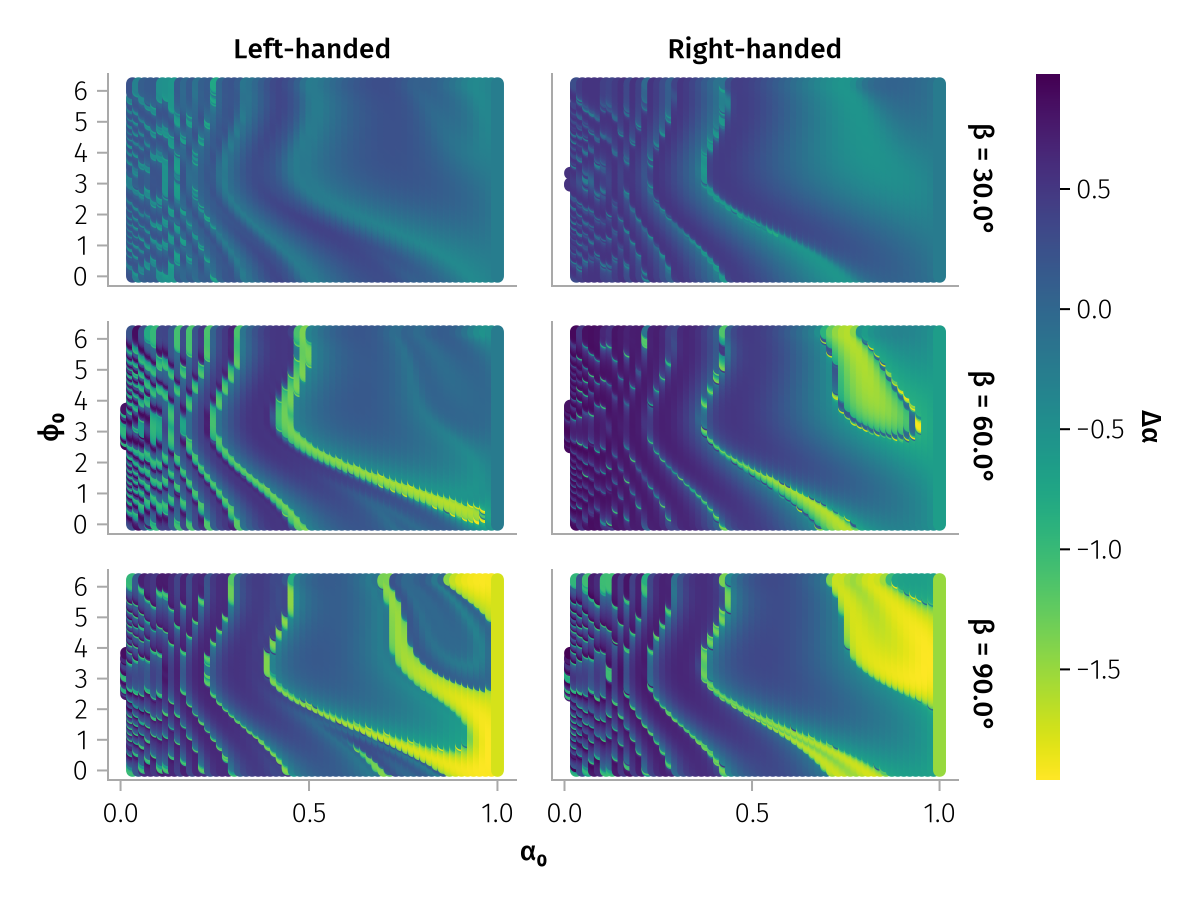

In [132]:
tdf = @subset(func(df), :v .== 8, :θ .== 45);
l = data(tdf) * mapping(col=sign_map,row=β_map)
w1_map_plot(l; color=Δα)

In [ ]:
# Create a layer with faceting for α, β, and v
begin
    using GLMakie
    GLMakie.activate!()
    fg = pa_pair_plot(layer; figure = figure)
end